In [65]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:/Users/H.A/Downloads/titanic.csv')
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('E45',inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
from sklearn.preprocessing import LabelEncoder
cleanup_num={
    'Sex':{"male":1, "female":1}
}
df.replace(cleanup_num,inplace=True)
df['Cabin']= LabelEncoder().fit_transform(df['Cabin'])
df['Embarked']= LabelEncoder().fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,63,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,63,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,63,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,63,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,63,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,63,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,22,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,63,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,63,2


In [67]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin','Embarked']]
y= df['Survived']
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
#applying tree algorithm
treed = tree.DecisionTreeClassifier()  
treed.fit(x_train, y_train)   #fitting our model
y_pred=treed.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.5595238095238095


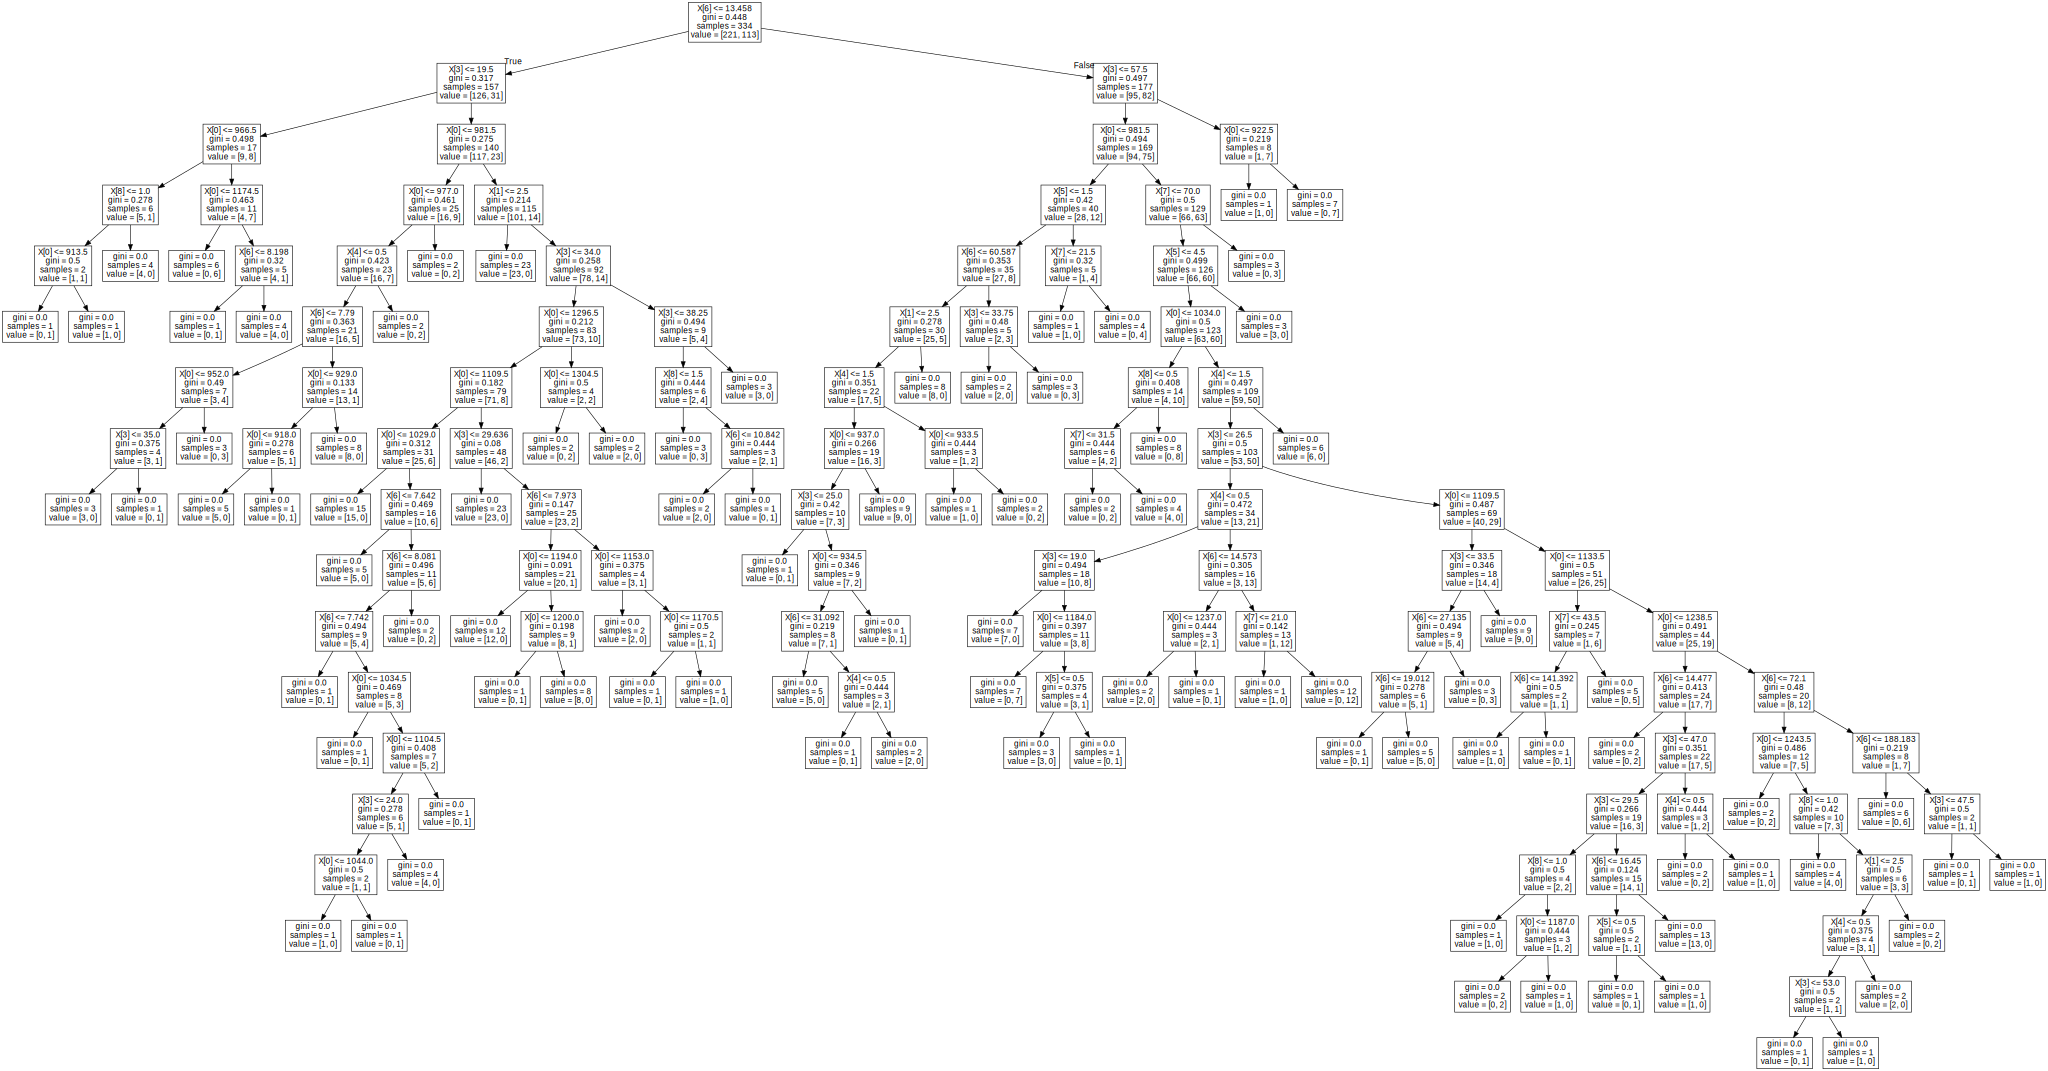

In [68]:
import graphviz
do_data = tree.export_graphviz(treed,out_file=None)
graph = graphviz.Source(do_data)
graph.render("data")
graph

In [69]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x2=df[['Pclass','Age', 'Fare', 'Cabin','Embarked']]
y2= df['Survived']
#splitting data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.20,random_state=10)
#applying tree algorithm
treedF = tree.DecisionTreeClassifier()  
treedF.fit(x_train2, y_train2)   #fitting our model
y_pred2=treedF.predict(x_test2)   # evaluating our model
print("score:{}".format(accuracy_score(y_test2, y_pred2)))

score:0.6071428571428571


In [70]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X3=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin','Embarked']] #features
y3=df['Survived']  #target
x_train3, x_test3, y_train3, y_test3= train_test_split(X3, y3, test_size=0.3) #splitting data with test size of 30%

In [74]:
clf=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf.fit(x_train3, y_train3)  #Training our model
y_pred3=clf.predict(x_test3)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred3))  #Measuring the accuracy of our model


Accuracy: 0.5952380952380952


In [72]:
n_estimators=30
scores1=[]
for k in range(1,30):
    clf1=RandomForestClassifier(n_estimators-k)
    clf1.fit(x_train3, y_train3)
    y_pred3=clf1.predict(x_test3)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred3,y_test3),2))
    scores1.append(round(accuracy_score(y_pred3,y_test3),2))

Accuracy for k= 1 is: 0.67
Accuracy for k= 2 is: 0.6
Accuracy for k= 3 is: 0.6
Accuracy for k= 4 is: 0.6
Accuracy for k= 5 is: 0.61
Accuracy for k= 6 is: 0.62
Accuracy for k= 7 is: 0.57
Accuracy for k= 8 is: 0.61
Accuracy for k= 9 is: 0.6
Accuracy for k= 10 is: 0.67
Accuracy for k= 11 is: 0.6
Accuracy for k= 12 is: 0.58
Accuracy for k= 13 is: 0.58
Accuracy for k= 14 is: 0.6
Accuracy for k= 15 is: 0.57
Accuracy for k= 16 is: 0.61
Accuracy for k= 17 is: 0.62
Accuracy for k= 18 is: 0.56
Accuracy for k= 19 is: 0.55
Accuracy for k= 20 is: 0.62
Accuracy for k= 21 is: 0.6
Accuracy for k= 22 is: 0.62
Accuracy for k= 23 is: 0.56
Accuracy for k= 24 is: 0.59
Accuracy for k= 25 is: 0.55
Accuracy for k= 26 is: 0.63
Accuracy for k= 27 is: 0.56
Accuracy for k= 28 is: 0.6
Accuracy for k= 29 is: 0.56


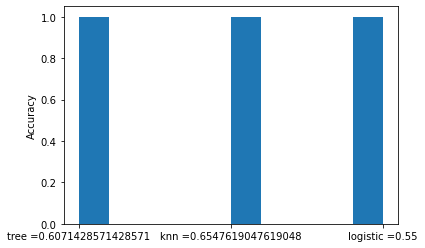

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = [['tree =0.6071428571428571','knn =0.6547619047619048', 'logistic =0.55']]
 


plt.ylabel("Accuracy")

plt.hist(x)
plt.show() 

Text(0, 0.5, 'Accuracy')

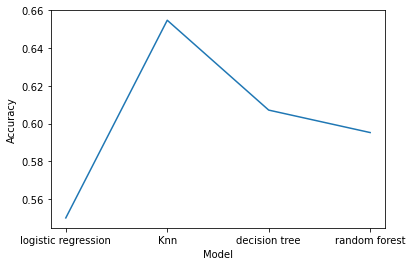

In [8]:
plt.plot(['logistic regression','Knn','decision tree', 'random forest'],[0.55, 0.6547619047619048, 0.6071428571428571, 0.5952380952380952])
plt.xlabel('Model')
plt.ylabel('Accuracy')